In [1]:
import wavecalc as wc
import numpy as np
from math import pi
import matplotlib.pyplot as pl
import os
import copy

Importing wavecalc.classes as obj 
Importing wavecalc.functions as fun 
Working in a development branch of wavecalc


In [2]:
import matplotlib.pyplot as pl

In [15]:
pwd

'/Users/ryan/git/wavecalc'

In [5]:
a=wc.composites.prism(wc.materials.ktp(),90)

In [6]:
a.norm1

array([[ 0.        ],
       [-0.70710678],
       [ 0.70710678]])

In [7]:
a.norm2

array([[0.        ],
       [0.70710678],
       [0.70710678]])

In [9]:
a.material

array([[3.02038842, 0.        , 0.        ],
       [0.        , 3.04665855, 0.        ],
       [0.        , 0.        , 3.34768855]])

In [7]:
np.sqrt(3.0065 + 0.03901 / ( 1.064**2 - 0.04251) - 0.01327*1.064**2)

1.7399079502434365

In [8]:
np.sqrt(3.0333 + 0.04154 / ( 1.064**2 - 0.04547) - 0.01408*1.064**2)

1.7480241739802462

In [9]:
a= 3.29100+ (0.04140/(1.064**2-0.03978))+(9.35522/(1.064**2-31.45571))
np.sqrt(a)

1.7379264717305054

In [10]:
b=  3.45018 + (0.04341/(1.064**2-0.04597))+(16.98825/(1.064**2-39.43799))
np.sqrt(b) 

1.7454680019979687

In [3]:
ktp = wc.materials.ktp()
ktp.epsilon

array([[3.02038842, 0.        , 0.        ],
       [0.        , 3.04665855, 0.        ],
       [0.        , 0.        , 3.34768855]])

In [4]:
np.sqrt(ktp.epsilon)

array([[1.73792647, 0.        , 0.        ],
       [0.        , 1.745468  , 0.        ],
       [0.        , 0.        , 1.82966897]])

In [5]:
a = None
b =a 

In [6]:
b

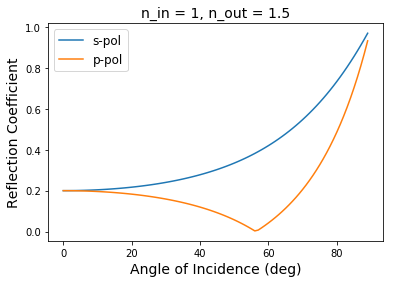

In [50]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med

thetas = np.linspace(0,89,90)

Refls_s = []
Refls_p = []

for t in thetas:

    wav_s.rotate(t,'x')
    wav_p.rotate(t,'x')
    
    #out_s = wc.fun.crash(wav_s,surf)
    #out_p = wc.fun.crash(wav_p,surf)
    
    out_s = wav_s@surf
    out_p = wav_p@surf
    
    #print(t,len(out_s),len(out_p))
    
    out_s = out_s[0]
    out_p = out_p[0]
    
    refl_s = out_s.amp()
    refl_p = out_p.amp()
    
    Refls_s.append(refl_s)
    Refls_p.append(refl_p)
    
    wav_s.rotate(-t,'x')
    wav_p.rotate(-t,'x')
    
Refls_s = np.asarray(Refls_s)
Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1, n_out = 1.5",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
fig.savefig('test_plots/reflection_coeffs_example.png',bbox_inches='tight')
pl.show()

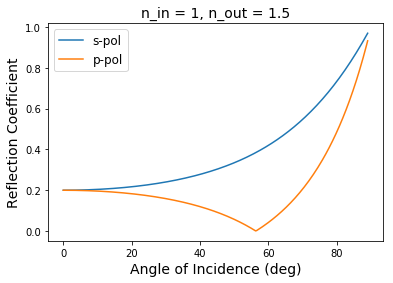

In [279]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med

thetas = np.linspace(0,89,270)

Refls_s = []
Refls_p = []

for t in thetas:

    wav_s.rotate(t,'x'); wav_p.rotate(t,'x')
    out_s = (wav_s@surf)[0]; out_p = (wav_p@surf)[0]
    refl_s = out_s.amp(); refl_p = out_p.amp()
    Refls_s.append(refl_s);Refls_p.append(refl_p)
    wav_s.rotate(-t,'x'); wav_p.rotate(-t,'x')
    
Refls_s = np.asarray(Refls_s);Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1, n_out = 1.5",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/reflection_coeffs_example.pdf',bbox_inches='tight')
pl.show()

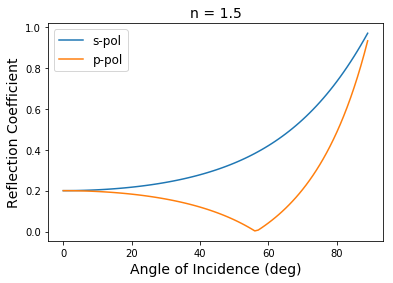

In [7]:
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n = 1.5",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
pl.show()

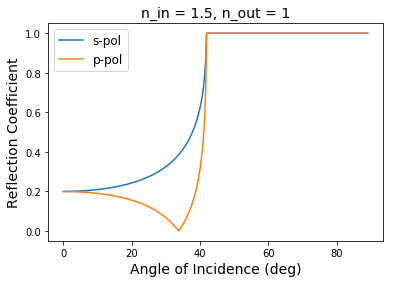

In [285]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = med + surf
wav_s = wav_s + med
wav_p = wav_p + med
wav_s.fixmode()
wav_p.fixmode()

thetas = np.linspace(0,89,360)

Refls_s = []
Refls_p = []

for t in thetas:

    wav_s.rotate(t,'x')
    wav_p.rotate(t,'x')
    
    #out_s = wc.fun.crash(wav_s,surf)
    #out_p = wc.fun.crash(wav_p,surf)
    
    out_s = wav_s@surf
    out_p = wav_p@surf
    
    #print(t,len(out_s),len(out_p))
    
    out_s = out_s[0]
    out_p = out_p[0]
    
    refl_s = out_s.amp()
    refl_p = out_p.amp()
    
    Refls_s.append(refl_s)
    Refls_p.append(refl_p)
    
    wav_s.rotate(-t,'x')
    wav_p.rotate(-t,'x')
    
Refls_s = np.asarray(Refls_s)
Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1.5, n_out = 1",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
pl.show()
#fig.savefig('test_plots/total_internal_reflection_example.pdf',bbox_inches='tight')

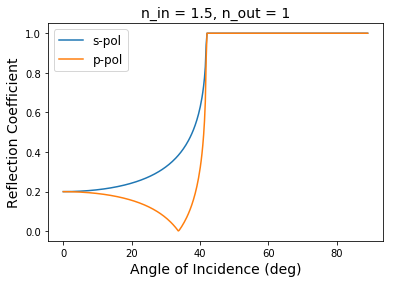

In [14]:
wav_s = wc.obj.wave(pol='x');wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = med + surf
wav_s = wav_s + med ; wav_p = wav_p + med
wav_s.fixmode() ; wav_p.fixmode()
thetas = np.linspace(0,89,361)
Refls_s = [] ; Refls_p = []
for t in thetas:
    wav_s.rotate(t,'x');wav_p.rotate(t,'x')
    out_s = (wav_s@surf)[0];out_p = (wav_p@surf)[0]
    refl_s = out_s.amp();refl_p = out_p.amp()
    Refls_s.append(refl_s);Refls_p.append(refl_p)
    wav_s.rotate(-t,'x');wav_p.rotate(-t,'x')
Refls_s = np.asarray(Refls_s);Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1.5, n_out = 1",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
pl.show()
#fig.savefig('test_plots/total_internal_reflection_example.pdf',bbox_inches='tight')

In [5]:
wav_s = wc.obj.wave(pol='x');wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = med + surf
wav_s = wav_s + med
wav_s.rotate(23,'x',fix=True)
wav_s.pol()

array([[1.00000000e+00],
       [0.00000000e+00],
       [2.22044605e-16]])

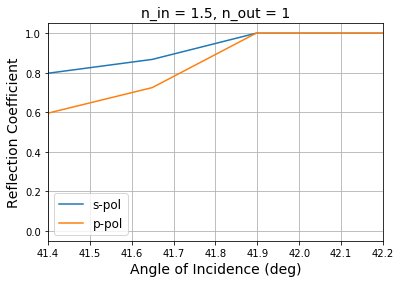

In [286]:
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1.5, n_out = 1",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
pl.xlim(41.4,42.2)
#pl.ylim(0,0.02)
pl.grid(True)
pl.show()

In [266]:
(180/pi)*np.arctan(1/1.5)

33.690067525979785

In [270]:
(180/pi)*np.arctan(1/1.46)

34.40847225202862

In [280]:
(180/pi)*np.arcsin(1/1.5)

41.810314895778596

In [13]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med

thetas = np.linspace(0,89,90)

wav_s.rotate(87,'x')
wav_p.rotate(87,'x')
    
out_s = wc.fun.crash(wav_s,surf,verbose=True)[0]
out_p = (wav_p @ surf)[0]
    
refl_s = out_s.amp()
refl_p = out_p.amp()

Assuming k0 = 1
x' = [[ 0. -1.  0.]]
y' = [[ 1.  0. -0.]]
z' = [[0. 0. 1.]]
k_hat . s_hat =  0.05233595624294397
U =  [[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0. -0.  1.]]
Uinv =  [[-0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
DELTA_r = 0.0
SIGMA_r = (-0.005478104631726932+0j)
PSI_r = 0j
GAMMA_r = (7.502407589177196e-06+0j)
DELTA_t = 0.0
SIGMA_t = (-5.637325735421386+0j)
PSI_t = 0j
GAMMA_t = (3.5310490496938076+0j)
Quartic roots are approximated as:  [(-0.052335956243535625+1.1311690577260623e-07j), (-0.05233595624259915-1.1311690577709927e-07j), (1.119258259880485-2.8721408321569124e-08j), (1.1192582598851066+2.8721408584786445e-08j)]
k_alpha =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
  -0.05233596-1.13116906e-07j]]
k_ beta =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
  -0.05233596+1.13116906e-07j]]
k_gamma =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
   1.11925826-2.87214083e-08j]]
k_ nu =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e

In [12]:
refl_s

0.0

In [7]:
out_s.kvec

array([[ 0.        +0.00000000e+00j],
       [-0.99862953+0.00000000e+00j],
       [-0.05233596-1.13116906e-07j]])

In [3]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med


wav_s.rotate(0.,'x')
wav_p.rotate(0.,'x')
    
out_s = wc.fun.crash(wav_s,surf,verbose=True)
out_p = wc.fun.crash(wav_p,surf)

Assuming k0 = 1
x' = [[1. 0. 0.]]
y' = [[0. 1. 0.]]
z' = [[0. 0. 1.]]
k_hat . s_hat =  1.0
U =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Uinv =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
DELTA_r = 0.0
SIGMA_r = (-2+0j)
PSI_r = 0j
GAMMA_r = (1+0j)
DELTA_t = 0.0
SIGMA_t = (-10.125+0j)
PSI_t = 0j
GAMMA_t = (11.390625+0j)
Quartic roots are approximated as:  [-1.0000000036332495, -0.9999999963667489, 1.4999999572855278, 1.5000000427144764]
k_alpha =  [[ 0.  0. -1.]]
k_ beta =  [[ 0.  0. -1.]]
k_gamma =  [[0.         0.         1.49999996]]
k_ nu =  [[0.         0.         1.50000004]]
eigenvalue should be: 0.9999999927334977
eigenvalues approximated as: [1.         1.         1.99999999]
over*under =  [1. 1. 0.]
eigenvalue should be: 1.000000007266499
eigenvalues approximated as: [1.         1.         2.00000001]
over*under =  [1. 1. 0.]
eigenvalue should be: 2.2499998718565855
eigenvalues approximated as: [2.25       2.25       4.49999987]
over*under =  [1. 1. 0.]
eigenvalue should be: 2.250000128

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
-0.j*np.array([[0.,1.,0.]]).T

array([[0.-0.j],
       [0.-0.j],
       [0.-0.j]])

In [7]:
a = -0.j*np.array([[0.,1.,0.]]).T
really = np.isreal(a).all()
if really:
    a = np.asarray(a,dtype=float)
        
a

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([[0.],
       [0.],
       [0.]])

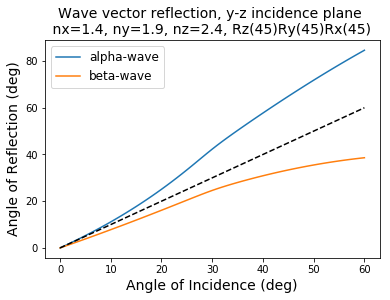

In [257]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)#wc.materials.ktp()
med.rotate(45,'x')
med.rotate(45,'y')
med.rotate(45,'z')
surf = med + surf
wav = wav + med

thetas = np.linspace(0,60,61)#np.linspace(0,60,61)

Ang_a = []
Ang_b = []

for t in thetas:

    wav.rotate(t,'x')
    wav.fixmode()
    
    out = wav@surf
    
    out_a = out[0]
    out_b = out[1]
    
    k_a = out_a.kvec
    k_b = out_b.kvec
    
    ang_a = np.arctan(k_a[1,0]/k_a[2,0])
    ang_b = np.arctan(k_b[1,0]/k_b[2,0])
    
    ang_a = (180/pi)*ang_a
    ang_b = (180/pi)*ang_b
    
    Ang_a.append(ang_a)
    Ang_b.append(ang_b)
    
    wav.rotate(-t,'x')
    
Ang_a = np.asarray(Ang_a)
Ang_b = np.asarray(Ang_b)
    
fig = pl.figure()
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.plot(thetas,thetas,'k--')
pl.title("Wave vector reflection, y-z incidence plane \n nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45) ",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Angle of Reflection (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/arbitrary_reflection_example.pdf',bbox_inches='tight')
pl.show()

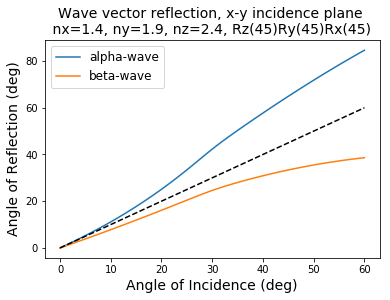

In [28]:
fig = pl.figure()
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.plot(thetas,thetas,'k--')
pl.title("Wave vector reflection, x-y incidence plane \n nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45) ",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Angle of Reflection (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/arbitrary_reflection_example.png',bbox_inches='tight')
pl.show()

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


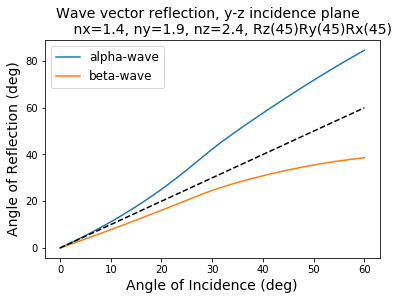

In [2]:
wav = wc.obj.wave()
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)
med.rotate(45,'x') ; med.rotate(45,'y') ; med.rotate(45,'z')
surf = med + surf
wav = wav + med
thetas = np.linspace(0,60,181)
Ang_a = [] ; Ang_b = []
for t in thetas:
    wav.rotate(t,'x',fix=True) 
    out = wav@surf
    out_a = out[0] ; out_b = out[1]
    k_a = out_a.kvec ; k_b = out_b.kvec
    ang_a = (180/pi)*np.arctan(k_a[1,0]/k_a[2,0])
    ang_b = (180/pi)*np.arctan(k_b[1,0]/k_b[2,0])
    Ang_a.append(ang_a) ; Ang_b.append(ang_b)
    wav.rotate(-t,'x')
Ang_a = np.asarray(Ang_a) ; Ang_b = np.asarray(Ang_b)
    
fig = pl.figure()
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.plot(thetas,thetas,'k--')
pl.title('''Wave vector reflection, y-z incidence plane  
         nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Angle of Reflection (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/arbitrary_reflection_example.pdf',bbox_inches='tight')
pl.show()

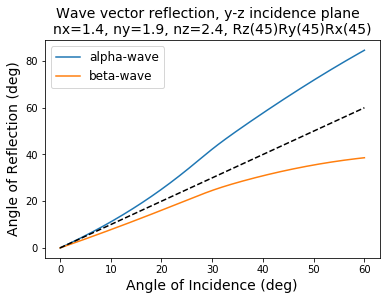

In [27]:
fig = pl.figure()
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.plot(thetas,thetas,'k--')
pl.title('''Wave vector reflection, y-z incidence plane  
nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Angle of Reflection (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/arbitrary_reflection_example.pdf',bbox_inches='tight')
pl.show()

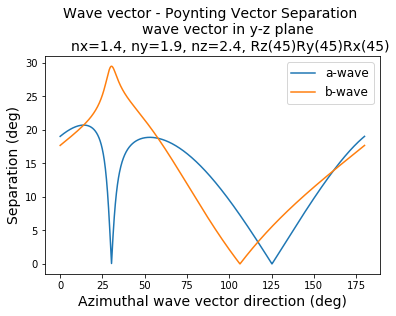

In [28]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)#wc.materials.ktp()
med.rotate(45,'x')
med.rotate(45,'y')
med.rotate(45,'z')
surf = med + surf
wav = wav + med

thetas = np.linspace(0,180,1441)#np.linspace(0,60,61)

poyn_k_ang_a = []
poyn_k_ang_b = []

for t in thetas:

    wav.rotate(t,'x')
    wav_a = copy.deepcopy(wav)
    wav_b = copy.deepcopy(wav)
    
    out = wc.fun.modes(wav,med,k0=1)
    
    wav_a.fixmode(ab=0)
    wav_b.fixmode(ab=1)
    
    poyn_a = wav_a.poynting()
    poyn_b = wav_b.poynting()
    k_a = wav_a.kvec
    k_b = wav_b.kvec
    
    p_norm_a = np.sqrt(poyn_a.T @ poyn_a)[0,0]
    p_norm_b = np.sqrt(poyn_b.T @ poyn_b)[0,0]
    k_norm_a = np.sqrt(k_a.T @ k_a)[0,0]
    k_norm_b = np.sqrt(k_b.T @ k_b)[0,0]
    
    poyn_a = poyn_a/p_norm_a
    poyn_b = poyn_b/p_norm_b
    k_a = k_a/k_norm_a
    k_b = k_b/k_norm_b
    
    p_k_a = (poyn_a.T @ k_a)[0,0]
    p_k_b = (poyn_b.T @ k_b)[0,0]
    
    ang_a = (180/pi)*np.arccos(p_k_a).real
    ang_b = (180/pi)*np.arccos(p_k_b).real
    
    poyn_k_ang_a.append(ang_a)
    poyn_k_ang_b.append(ang_b)
    
    wav.rotate(-t,'x')
    
poyn_k_ang_a = np.asarray(poyn_k_ang_a)
poyn_k_ang_b = np.asarray(poyn_k_ang_b)

    
fig = pl.figure()
pl.plot(thetas,poyn_k_ang_a,label='a-wave')
pl.plot(thetas,poyn_k_ang_b,label='b-wave')
pl.title('''Wave vector - Poynting Vector Separation 
        wave vector in y-z plane 
        nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Azimuthal wave vector direction (deg)",fontsize=14)
pl.ylabel("Separation (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/poynting_vec_separation.pdf',bbox_inches='tight')
pl.show()

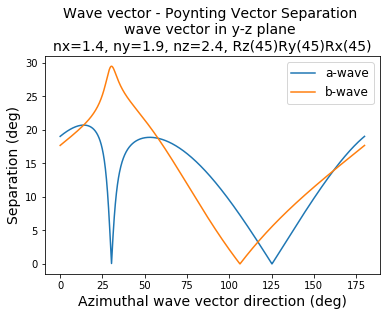

In [30]:
fig = pl.figure()
pl.plot(thetas,poyn_k_ang_a,label='a-wave')
pl.plot(thetas,poyn_k_ang_b,label='b-wave')
pl.title('''Wave vector - Poynting Vector Separation 
wave vector in y-z plane 
nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Azimuthal wave vector direction (deg)",fontsize=14)
pl.ylabel("Separation (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/poynting_vec_separation.pdf',bbox_inches='tight')
pl.show()

In [259]:
(180/pi)*np.arctan(1/1.5)

33.690067525979785

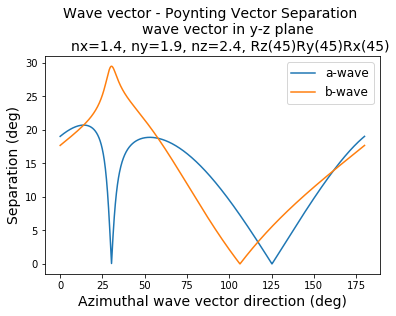

In [14]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)
med.rotate(45,'x') ; med.rotate(45,'y') ; med.rotate(45,'z')
surf = med + surf
wav = wav + med
thetas = np.linspace(0,180,1441)
S_k_ang_a = [] ; S_k_ang_b = []
for t in thetas:
    wav.rotate(t,'x')
    wav_a = copy.deepcopy(wav) ; wav_b = copy.deepcopy(wav)
    wav_a.fixmode(ab=0) ; wav_b.fixmode(ab=1)
    S_a = wav_a.poynting(norm=True) ; S_b = wav_b.poynting(norm=True)
    k_a = wav_a.kvec ; k_b = wav_b.kvec
    norm_a = np.sqrt(k_a.T @ k_a)[0,0] ; norm_b = np.sqrt(k_b.T @ k_b)[0,0]
    k_a = k_a/norm_a ; k_b = k_b/norm_b
    S_k_a = (S_a.T @ k_a)[0,0] ; S_k_b = (S_b.T @ k_b)[0,0]
    ang_a = (180/pi)*np.arccos(S_k_a).real ; ang_b = (180/pi)*np.arccos(S_k_b).real
    S_k_ang_a.append(ang_a) ; S_k_ang_b.append(ang_b)
    wav.rotate(-t,'x')
S_k_ang_a = np.asarray(S_k_ang_a)
S_k_ang_b = np.asarray(S_k_ang_b)

fig = pl.figure()
pl.plot(thetas,S_k_ang_a,label='a-wave')
pl.plot(thetas,S_k_ang_b,label='b-wave')
pl.title('''Wave vector - Poynting Vector Separation 
        wave vector in y-z plane 
        nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Azimuthal wave vector direction (deg)",fontsize=14)
pl.ylabel("Separation (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/poynting_vec_separation.pdf',bbox_inches='tight')
pl.show()

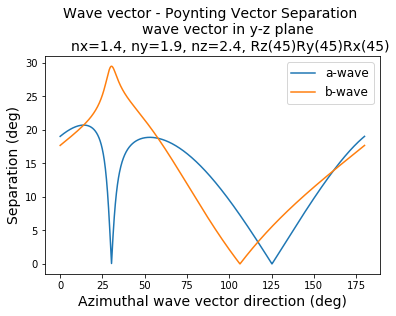

In [15]:
fig = pl.figure()
pl.plot(thetas,S_k_ang_a,label='a-wave')
pl.plot(thetas,S_k_ang_b,label='b-wave')
pl.title('''Wave vector - Poynting Vector Separation 
        wave vector in y-z plane 
        nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Azimuthal wave vector direction (deg)",fontsize=14)
pl.ylabel("Separation (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/poynting_vec_separation.pdf',bbox_inches='tight')
pl.show()

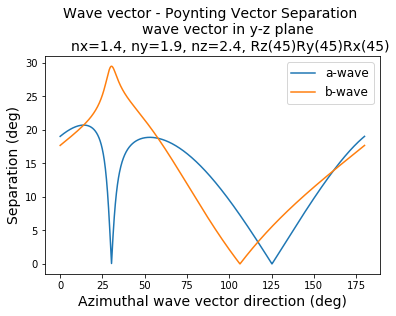

In [20]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)
med.rotate(45,'x') ; med.rotate(45,'y') ; med.rotate(45,'z')
surf = med + surf
wav = wav + med
wav_a = copy.deepcopy(wav) ; wav_b = copy.deepcopy(wav)
thetas = np.linspace(0,180,1441)
S_k_ang_a = [] ; S_k_ang_b = []
for t in thetas:
    wav_a.rotate(t,'x') ; wav_b.rotate(t,'x')
    wav_a.fixmode(ab=0) ; wav_b.fixmode(ab=1)
    S_a = wav_a.poynting(norm=True) ; S_b = wav_b.poynting(norm=True)
    k_a = wav_a.kvec ; k_b = wav_b.kvec
    k_a = k_a/np.linalg.norm(k_a) ; k_b = k_b/np.linalg.norm(k_b)
    S_k_a = (S_a.T @ k_a)[0,0] ; S_k_b = (S_b.T @ k_b)[0,0]
    ang_a = (180/pi)*np.arccos(S_k_a).real ; ang_b = (180/pi)*np.arccos(S_k_b).real
    S_k_ang_a.append(ang_a) ; S_k_ang_b.append(ang_b)
    wav_a.rotate(-t,'x') ; wav_b.rotate(-t,'x')
S_k_ang_a = np.asarray(S_k_ang_a)
S_k_ang_b = np.asarray(S_k_ang_b)

fig = pl.figure()
pl.plot(thetas,S_k_ang_a,label='a-wave')
pl.plot(thetas,S_k_ang_b,label='b-wave')
pl.title('''Wave vector - Poynting Vector Separation 
        wave vector in y-z plane 
        nx=1.4, ny=1.9, nz=2.4, Rz(45)Ry(45)Rx(45)''',fontsize=14)
pl.xlabel("Azimuthal wave vector direction (deg)",fontsize=14)
pl.ylabel("Separation (deg)",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/poynting_vec_separation.pdf',bbox_inches='tight')
pl.show()

In [238]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)#wc.materials.ktp()
med.rotate(45,'x')
med.rotate(45,'y')
med.rotate(45,'z')
out = wc.fun.modes(wav,med,k0=1)

In [239]:
out

[(-2.1492905469423826+0j),
 (-1.6295408610899607-0j),
 (1.6295408610899607+0j),
 (2.1492905469423826-0j)]

In [13]:
180*8

1440

In [56]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)#wc.materials.ktp()
med.rotate(45,'x')
med.rotate(45,'y')
med.rotate(45,'z')
surf = med + surf
wav = wav + med
wav.rotate(37,'x')
wav.fixmode()

out=wc.fun.crash(wav,surf,verbose=True)

Assuming k0 = 1
x' = [[ 0.+0.j -1.+0.j  0.+0.j]]
y' = [[ 1.+0.j  0.+0.j -0.+0.j]]
z' = [[0. 0. 1.]]
k_hat . s_hat =  (0.7986355100472928+0j)
U =  [[ 0.+0.j  1.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  1.+0.j]]
Uinv =  [[ 0.-0.j -1.-0.j  0.-0.j]
 [ 1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j]]
DELTA_r = (-0.9564673840752809+0j)
SIGMA_r = (-15.893071146458833+0j)
PSI_r = (5.646856791430524+0j)
GAMMA_r = (13.658226479534889+0j)
DELTA_t = 0j
SIGMA_t = (0.5213188900337378+0j)
PSI_t = 0j
GAMMA_t = (0.067943346276502+0j)
Quartic roots are approximated as:  [-2.0080590986639084, -0.8365160983226343, (2.3411803661837453e-09-0.5105481724493647j), (3.236039158860393e-09+0.5105481864374642j)]
k_alpha =  [[ 0.        +0.j -1.12279092+0.j -0.8365161 +0.j]]
k_ beta =  [[ 0.        +0.j -1.12279092+0.j -2.0080591 +0.j]]
k_gamma =  [[ 0.00000000e+00+0.j         -1.12279092e+00+0.j
   2.34118037e-09-0.51054817j]]
k_ nu =  [[ 0.00000000e+00+0.j         -1.12279092e+00+0.j
   3.236

In [58]:
out[0].pol().T @ out[1].pol()

array([[0.09234962+0.06658289j]])

In [233]:
out[2].kvec.imag, out[3].kvec.imag

(array([[ 0.        ],
        [ 0.        ],
        [-0.51054817]]), array([[0.        ],
        [0.        ],
        [0.51054819]]))

In [236]:
out[2].amp(), out[3].amp()

(2.0667866203251126, 0.9824780147435656)

In [230]:
out[2].kvec.real.T @ out[2].kvec.real

array([[1.26065945]])

In [130]:
(180/pi)*np.arccos(0.09234962)

84.70120650318712

In [64]:
out[3].kvec

array([[ 0.00000000e+00+0.j        ],
       [-1.12279092e+00+0.j        ],
       [ 3.23603916e-09+0.51054819j]])

In [65]:
out[3].amp()

0.9824780147435656

In [54]:
(180/pi)*np.arcsin(1/2.28)

26.01436599963659

In [42]:
a=np.array([[-0.5223144 +0.j,-0.3209759 +0.j,0.79003933+0.j]]).T

In [43]:
out[0].pol()/a

array([[-0.4936776 +0.86964499j],
       [-0.49367761+0.86964501j],
       [-0.4936776 +0.869645j  ]])

In [68]:
a = np.array([[ 0.00000000e+00+0.j,-1.12279092e+00+0.j,2.34118037e-09-0.51054817j]]).T
b = np.array([[ 0.00000000e+00+0.j,-1.12279092e+00+0.j,3.23603916e-09+0.51054819j]]).T
(a.T @ a).imag

array([[-2.39057071e-09]])

In [254]:
(180/pi)*np.arctan(1.46)

55.59152774797138

In [5]:
wav_p.efield

array([[0.],
       [1.],
       [0.]])

In [6]:
out_s[0].kvec, out_s[1].kvec

(array([[ 0.],
        [ 0.],
        [-1.]]), array([[ 0.],
        [ 0.],
        [-1.]]))

In [7]:
out_s[0].efield, out_s[1].efield

(array([[ 0.],
        [ 0.],
        [-1.]]), array([[ 0.],
        [ 0.],
        [-1.]]))

In [29]:
out_s.efield

array([[ 0.],
       [ 0.],
       [-1.]])

In [27]:
out_p.pol()

array([[ 0.],
       [ 0.],
       [-1.]])

In [28]:
out_p.efield

array([[ 0.],
       [ 0.],
       [-1.]])

In [13]:
out_s.amp()**2

0.0402608238010001

In [5]:
Refls_p

[4.0,
 0.039983747548440994,
 0.03993500869921131,
 0.0398537465768352,
 0.0397399534892254,
 0.039593587298373006,
 4.000000034118326,
 0.039202963414607696,
 0.0389586049915816,
 0.0386814717975707,
 0.03837147985569601,
 0.03802857522194,
 0.03765268712573,
 3.999999993856827,
 4.000000037423371,
 0.0363264523891491,
 3.999999963557702,
 3.999999981586,
 0.034701281177023494,
 0.034093015277988505,
 3.9999999849923356,
 0.03277685540681371,
 0.03206912291601299,
 0.03132847695096889,
 0.030555118632678093,
 0.029749331621455398,
 4.000000001919139,
 0.028041899851458,
 4.000000004660471,
 0.026210047798779897,
 0.025249145488797604,
 0.024259439416062498,
 0.0232420015907291,
 0.0221981090918534,
 0.021129244518161002,
 0.020037130966574796,
 0.018923770646045,
 0.017791473887472504,
 0.016642902919156898,
 4.000000036001925,
 3.999999931074694,
 0.013132249773055998,
 0.0119537468010724,
 0.010779225441199402,
 0.009614566577646502,
 0.008466458206185802,
 0.007342482420846399,
 0.

In [4]:
.5/(2.5)

0.2

In [136]:
MM = np.array([[1.,0.,0.],[0,2.,0],[0.,0.,3.]])
p = np.array([[0,1.,0]]).T
p = wc.fun.rotate(p,1,'x')
q=(MM @ p)/2

for i in range(0,50):
    q = (MM @ q)/2

q

array([[0.00000000e+00],
       [9.99847695e-01],
       [1.66920444e+07]])

In [6]:
thetas = np.linspace(0,10,11)
for t in thetas:
    print(t)
    print(isinstance(t,(int,float)))

0.0
True
1.0
True
2.0
True
3.0
True
4.0
True
5.0
True
6.0
True
7.0
True
8.0
True
9.0
True
10.0
True


In [45]:
a = np.array([[1.,0.,0.]]).T
b = wc.fun.rotate(a,0.00114595,'y')
c =(b - a)
d = b+a
(c.T @ c)/(d.T @d)

array([[1.00006006e-10]])

In [46]:
0.00114595*60*60

4.12542

In [47]:
0.00114595*(pi/180)

2.0000600563229018e-05

In [48]:
20e-6

2e-05

In [120]:
a = np.random.rand(3,3)
a

array([[0.59073974, 0.32105747, 0.16259889],
       [0.6387805 , 0.93998759, 0.2070962 ],
       [0.11663531, 0.41183313, 0.25188489]])

In [86]:
a[:,0] = 0
a

array([[0.        , 0.82177537, 0.3700262 ],
       [0.        , 0.87565391, 0.51492013],
       [0.        , 0.9132826 , 0.68749427]])

In [119]:
a[1,]

array([0.        , 0.87565391, 0.51492013])

In [91]:
b,c =np.where(np.abs(a)>5e-1)
test = a[b,c]
test = np.sort(test)
test

array([0.51492013, 0.68749427, 0.82177537, 0.87565391, 0.9132826 ])

In [123]:
np.argmax(np.abs(np.array([1,2,3,-40])))

3

In [95]:
np.ndarray.argmax(a)

7

In [288]:
1 is True

False

In [125]:
abs(a)

array([[0.59073974, 0.32105747, 0.16259889],
       [0.6387805 , 0.93998759, 0.2070962 ],
       [0.11663531, 0.41183313, 0.25188489]])

In [96]:
7 % 2

1

In [117]:
q= 7
(q//3),q % 3

(2, 1)

In [127]:
a-np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])

array([[-0.40926026,  0.32105747,  0.16259889],
       [ 0.6387805 , -0.06001241,  0.2070962 ],
       [ 0.11663531,  0.41183313, -0.74811511]])

In [140]:
a[[0]]

array([[0.59073974, 0.32105747, 0.16259889]])

In [162]:
import copy

In [179]:
a = np.random.rand(3,3)
a

array([[0.25223892, 0.71322156, 0.5721286 ],
       [0.82173531, 0.76392466, 0.24465102],
       [0.2755138 , 0.55650491, 0.64608006]])

In [225]:
aa = np.array([[1,0.,0],[0,2,0],[0,0,3]])
ID = np.array([[1.,0,0],[0,1,0],[0,0,1]])
aa = wc.fun.rotate(aa,20,'x')
aa = wc.fun.rotate(aa,-79,'z')
aaa = aa -3*ID
b = copy.deepcopy(aaa)
g = np.argmax(abs(b[:,0]))
b[[g,0]]=b[[0,g]]
b[[1]] = b[[1]]-(b[1,0]/b[0,0])*b[[0]]
b[[2]] = b[[2]]-(b[2,0]/b[0,0])*b[[0]]
g = np.argmax(abs(b[[1,2],1]))+1
b[[g,1]]=b[[1,g]]
b[[2]] = b[[2]] - (b[2,1]/b[1,1])*b[[1]]

b

array([[-9.23689230e-01,  2.09213620e-01, -3.15488895e-01],
       [ 0.00000000e+00, -1.91194656e+00, -1.32782384e-01],
       [ 0.00000000e+00,  0.00000000e+00,  3.38271078e-16]])

In [224]:
np.linalg.matrix_rank(aaa)

2

In [218]:
xyz=np.array([0.,0.,0.])
xyz[2] = 1.
xyz[1] = -(xyz[2]*b[1,2])/b[1,1]
xyz[0] = -(xyz[1]*b[0,1]+xyz[2]*b[0,2])/b[0,0]
xyz

array([-2.74747742, -0.        ,  1.        ])

In [210]:
(aa@xyz)/2

array([0.        , 2.74747742, 1.        ])

In [183]:
b[[1]]-(b[1,0]/b[0,0])*b[[0]]

array([[0.        , 0.47872814, 0.49703081]])

In [184]:
b[[2]]-(b[2,0]/b[0,0])*b[[0]]

array([[0.        , 0.30037403, 0.56405276]])

In [152]:
a[[0,1],0:3]

array([[0.11663531, 0.41183313, 0.25188489],
       [0.6387805 , 0.93998759, 0.2070962 ]])

In [154]:
a[[1,0],0:3]

array([[0.6387805 , 0.93998759, 0.2070962 ],
       [0.11663531, 0.41183313, 0.25188489]])

In [158]:
a[[1,0]]

array([[0.6387805 , 0.93998759, 0.2070962 ],
       [0.11663531, 0.41183313, 0.25188489]])

In [166]:
np.argmax(abs(a[:,0]))

0

In [175]:
np.argmax(a[[1,2],1])+1

1

In [190]:
r = np.random.rand(3,3)
y = copy.deepcopy(r)
r

array([[0.18188562, 0.29535773, 0.56773785],
       [0.09107852, 0.23618494, 0.72163559],
       [0.24426515, 0.89647799, 0.80603538]])

In [192]:
y[0:3,[0,1]] = y[0:3,[1,0]]
y

array([[0.29535773, 0.18188562, 0.56773785],
       [0.23618494, 0.09107852, 0.72163559],
       [0.89647799, 0.24426515, 0.80603538]])

In [193]:
e = np.array([0,1,2])
u = copy.deepcopy(e)
e

array([0, 1, 2])

In [196]:
e[[0,1]] = e[[1,0]]
e

array([1, 0, 2])

In [5]:
wav = wc.obj.wave()
wav.rotate(45,'y')
med = wc.obj.medium(ep_all=2.25)
wav = wav + med
wav.amp(5)
wav.k(),wav.pol().T

(1.0, array([[ 0.70710678,  0.        , -0.70710678]]))

In [6]:
wav.fixmode()
wav.k(), wav.pol().T

(1.5, array([[ 0.70710678,  0.        , -0.70710678]]))

In [7]:
wav.amp(5)
wav.fixmode(conserve=True)
wav.amp()

5.0

In [8]:
123.5*np.sqrt(2)

174.65537495307726

In [16]:
w0 = 230e-6
w = 303e-6
ray=(pi*((w0)**2)/(1.064e-6))
ray*np.sqrt((w*w/(w0*w0))-1)

0.1339556744481372

In [13]:
230*np.sqrt(2)

325.2691193458119

In [8]:
w0*np.sqrt(1+(0.177/ray)**2)

0.000361871745035471

In [9]:
w0*np.sqrt(2)

0.0004285067093990478

In [7]:
ray

0.27107751873442226

In [32]:
w = wc.obj.wave() 
m = wc.obj.medium()#ep_all=2.25
w1 = w+m ; w2 = w+m
w1.fixmode(), w2.fixmode()
w1.pol().T, w2.pol().T

(array([[1., 0., 0.]]), array([[1., 0., 0.]]))

In [15]:
w.pol(),w.kvec

(array([[1.],
        [0.],
        [0.]]), array([[0. ],
        [0. ],
        [1.5]]))

In [33]:
for _ in range(180):
    w1.rotate(.25,'x',fix=True)
    
w2.rotate(45,'x',fix=True)

In [35]:
w1.pol().T,w2.pol().T

(array([[0.78114334, 0.44148334, 0.44148334]]), array([[1., 0., 0.]]))

In [27]:
.25*180

45.0

In [38]:
w2.kvec.T, w1.kvec

(array([[ 0.        , -0.70710678,  0.70710678]]), array([[ 4.44154571e-16],
        [-7.07106781e-01],
        [ 7.07106781e-01]]))

In [40]:
w = wc.obj.wave() 
m = wc.obj.medium(ep_all=2.25)
w= w+m
w.amp(2)
w.rotate(45,'x',fix=True)
w.amp()

2.0